<a href="https://colab.research.google.com/github/kkousar/fwc_personal/blob/main/cp_remover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

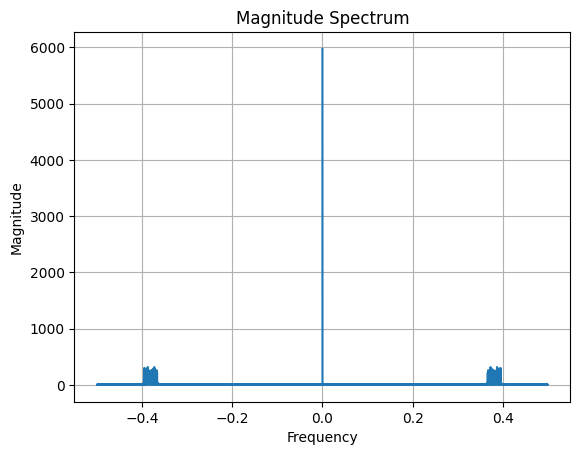

In [24]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

file1 = open("/puschTxAfterChannelImag.txt","r")
file2 = open("/puschTxAfterChannelReal.txt","r")
file3=open("/output.txt","a")
cp_added=[]
cp_removed=[]
c=0
for i in file1:
  for j in file2:
    cp_added.append(complex(float(i),float(j)))
#cp remover
cp_l=[320,288]
for i in cp_l:
  for j in range(4096):
    cp_removed.append(x[i+j+c])
  c+=288
fft_result = np.fft.fft(cp_removed)
file3.write(str(fft_result))

# Compute the magnitude spectrum
magnitude_spectrum = np.abs(fft_result)

# Frequency axis
sampling_rate = 1  # Assuming a sampling rate of 1 (change as per your data)
frequency_axis = np.fft.fftfreq(len(cp_removed), 1/sampling_rate)

# Plotting the magnitude spectrum
plt.plot(frequency_axis, magnitude_spectrum)
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude Spectrum')
plt.grid(True)
plt.show()
file1.close()
file2.close()
file3.close()